# Dogs & cats classification

## Training

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense

In [2]:
directory_of_train_dataset = 'C:/Users/zolta/DS&ML_projects/dogs-vs-cats/train'

In [3]:
train_dataset = []

for img in os.listdir(directory_of_train_dataset):
    if img[:3] == 'cat':
        label = 0
    else:
        label = 1
    
    path_of_img = os.path.join(directory_of_train_dataset, img)
    img_to_arr = cv2.imread(path_of_img)
    resized_img = cv2.resize(img_to_arr, (80, 80))
    train_dataset.append([resized_img, label])

In [4]:
random.shuffle(train_dataset)

In [6]:
X_temp = []
y_temp = []

for feats, label in train_dataset:
    X_temp.append(feats)
    y_temp.append(label)

In [7]:
X_train = np.array(X_temp)
y_train = np.array(y_temp)

In [8]:
X_train = X_train/255

In [9]:
X_train.shape # number of images, width, height, number of channels (RGB)

(25000, 80, 80, 3)

In [10]:
model = Sequential([
    
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    
    Dense(128, input_shape = X_train.shape[1:], activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
    
])

In [11]:
model.compile(optimizer = 'adam', loss = 'BinaryCrossentropy', metrics = ['accuracy'])

In [12]:
history = model.fit(X_train, y_train, epochs = 5, validation_split = 0.1, batch_size = 32)

Epoch 1/5
704/704 [==============================] - 13875s 20s/step - loss: 0.5939 - accuracy: 0.6675 - val_loss: 0.4957 - val_accuracy: 0.7732
Epoch 2/5
704/704 [==============================] - 741s 1s/step - loss: 0.4690 - accuracy: 0.7757 - val_loss: 0.4388 - val_accuracy: 0.7952
Epoch 3/5
704/704 [==============================] - 934s 1s/step - loss: 0.3942 - accuracy: 0.8206 - val_loss: 0.4194 - val_accuracy: 0.8104
Epoch 4/5
704/704 [==============================] - 620s 881ms/step - loss: 0.3420 - accuracy: 0.8491 - val_loss: 0.4014 - val_accuracy: 0.8140
Epoch 5/5
704/704 [==============================] - 642s 913ms/step - loss: 0.2853 - accuracy: 0.8760 - val_loss: 0.3346 - val_accuracy: 0.8532


In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

(0.6, 1.0)

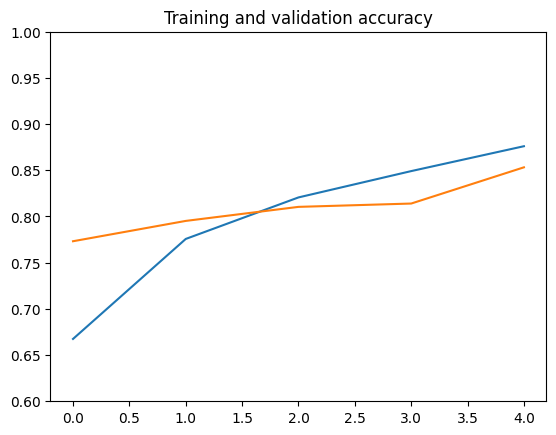

In [17]:
plt.plot(range(len(acc)), acc)
plt.plot(range(len(acc)), val_acc)
plt.title('Training and validation accuracy')
plt.ylim(0.6, 1.0)

In [41]:
acc_difference = abs(acc[4] - val_acc[4])

In [42]:
print(f"Difference between accuracy ({acc[4]:.4f}) and validation accuracy ({val_acc[4]:.4f}):", f"{acc_difference:.4f}")

Difference between accuracy (0.8760) and validation accuracy (0.8532): 0.0228


We can see that there's no significant difference between the accuracy of the train and validation sets. We might conclude there's no overfitting (high variance), but let's not forget we only trained the model through 5 iterations. It's possible later on the model would have high bias (underfitting) or high variance (overfitting) on the training dataset.

Text(0.5, 1.0, 'Training and validation loss')

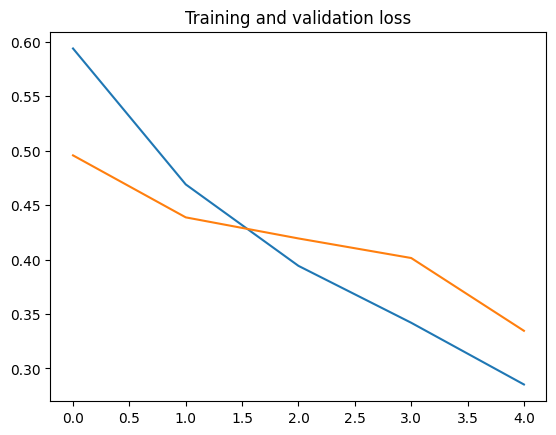

In [23]:
plt.plot(range(len(acc)), loss)
plt.plot(range(len(acc)), val_loss)
plt.title('Training and validation loss')

## Testing

In [45]:
directory_of_test_dataset = 'C:/Users/zolta/DS&ML_projects/dogs-vs-cats/test'

In [49]:
test_preds = []

for img in os.listdir(directory_of_test_dataset):
    img_id = img[0]
    
    path_of_img = os.path.join(directory_of_test_dataset, img)
    img_to_arr = cv2.imread(path_of_img)
    resized_img = cv2.resize(img_to_arr, (80, 80))
    
    resized_img = np.array(resized_img)
    resized_img = resized_img.reshape(-1, 80, 80, 3)
    
    prediction = model.predict(resized_img)
    if prediction >= 0.5:
        test_preds.append([img_to_arr, 1])
    else:
        test_preds.append([img_to_arr, 0])

1/1 [==============================] - 2s 2s/step


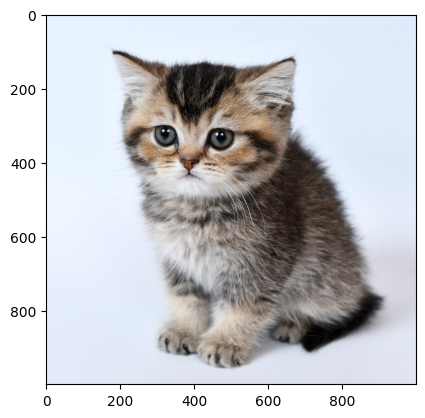

Cat


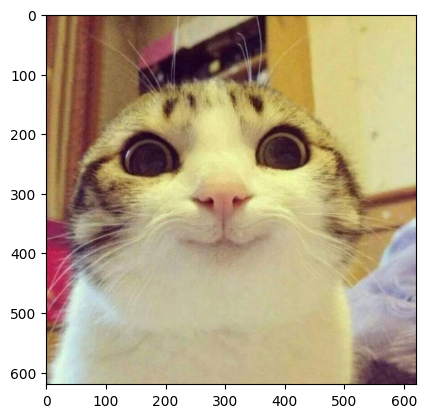

Dog


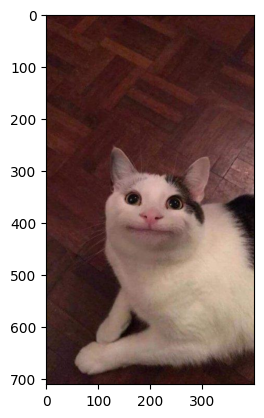

Cat


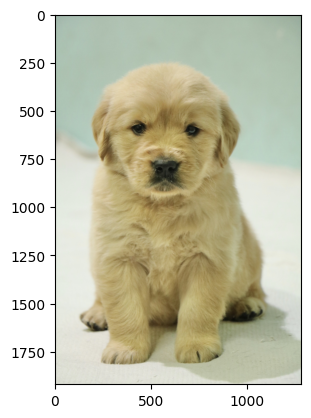

Dog


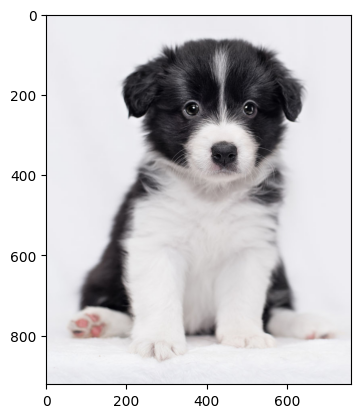

Dog


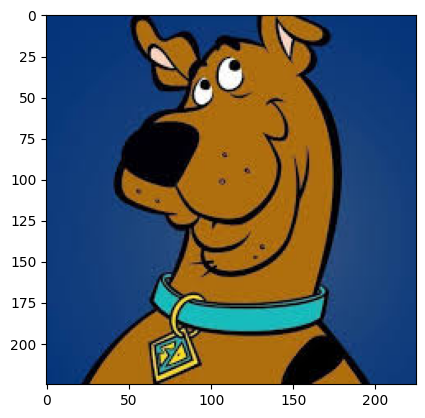

Dog


In [56]:
for img, label in test_preds:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    pixels = np.array(img)
    plt.imshow(pixels)
    plt.show()
    
    if label == 0:
        print('Cat')
    else:
        print('Dog')